In [2]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install nltk

In [14]:
import pandas as pd
import os
import collections
import re

'C:\\Users\\MoChe'

In [34]:
CV  = pd.read_csv("C:\\Users\\Moche\\Downloads\\Full Covid Database.txt")
print(CV)

                                                   Title
0      Recent advances in the detection of respirator...
1      Pneumonia of Unknown Etiology in Wuhan, China:...
2      A Novel Coronavirus from Patients with Pneumon...
3      A Novel Coronavirus Emerging in China - Key Qu...
4      Molecular mechanism for antibody-dependent enh...
...                                                  ...
12795                        An ACE therapy for COVID-19
12796                    A COVID-19 recovery for climate
12797  NIH launches competition to speed COVID-19 dia...
12798  An overdose surge will compound the COVID-19 p...
12799  Fauci mania! His voice for science during pand...

[12800 rows x 1 columns]


In [37]:
with open("C:\\Users\\Moche\\Downloads\\Full Covid Database.txt", "r") as my_file:
  for line in my_file:
      str = line.split()
      print(str)

['Title']
['Recent', 'advances', 'in', 'the', 'detection', 'of', 'respiratory', 'virus', 'infection', 'in', 'humans']
['"Pneumonia', 'of', 'Unknown', 'Etiology', 'in', 'Wuhan,', 'China:', 'Potential', 'for', 'International', 'Spread', 'Via', 'Commercial', 'Air', 'Travel"']
['"A', 'Novel', 'Coronavirus', 'from', 'Patients', 'with', 'Pneumonia', 'in', 'China,', '2019"']
['A', 'Novel', 'Coronavirus', 'Emerging', 'in', 'China', '-', 'Key', 'Questions', 'for', 'Impact', 'Assessment']
['Molecular', 'mechanism', 'for', 'antibody-dependent', 'enhancement', 'of', 'coronavirus', 'entry']
['Homologous', 'recombination', 'within', 'the', 'spike', 'glycoprotein', 'of', 'the', 'newly', 'identified', 'coronavirus', 'may', 'boost', 'cross-species', 'transmission', 'from', 'snake', 'to', 'human']
['A', 'familial', 'cluster', 'of', 'pneumonia', 'associated', 'with', 'the', '2019', 'novel', 'coronavirus', 'indicating', 'person-to-person', 'transmission:', 'a', 'study', 'of', 'a', 'family', 'cluster']
['E

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 2641: character maps to <undefined>

How many most common words to print: 50

OK. The 50 most common words are as follows

covid-19 :  6706
coronavirus :  3041
pandemic :  1654
disease :  1299
patients :  1280
novel :  1172
2019 :  1163
sars-cov-2 :  1018
(covid-19) :  831
infection :  816
outbreak :  798
health :  683
clinical :  669
china :  668
pneumonia :  567
care :  548
management :  465
treatment :  449
epidemic :  420
respiratory :  382
response :  362
severe :  336
new :  319
case :  314
cases :  312
acute :  298
wuhan :  285
virus :  283
potential :  283
analysis :  283
study :  279
time :  275
risk :  274
cancer :  268
prevention :  265
- :  262
impact :  260
control :  258
emergency :  258
review :  256
patient :  255
syndrome :  250
transmission :  249
2020 :  247
 :  243
global :  240
la :  238
characteristics :  234
medical :  231
public :  218


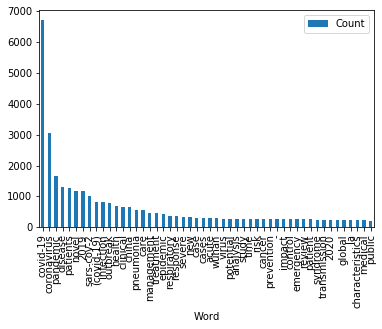

In [1]:
#copy the code and use your own stopwords to make it better!
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Read input file, note the encoding is specified here 
# It may be different in your text file
file = open("C:\\Users\\Moche\\Downloads\\Full Covid Database.txt", encoding="utf8")
a= file.read()
# Stopwords
stopwords = set(line.strip() for line in open('C:\\Users\\Moche\\Downloads\\Stopwords.txt'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')